In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg
import math
import scipy
from scipy.sparse import diags
from __future__ import division
from scipy import signal

In this problem we solve the time-dependent Schrodinger’s Equation for a particle in a box using the finite-difference method for a square well potential of width L. Since the wavefunction will be complex, we use the finite-difference methods on the spatial part of Ψ which is real.

Analytically: 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


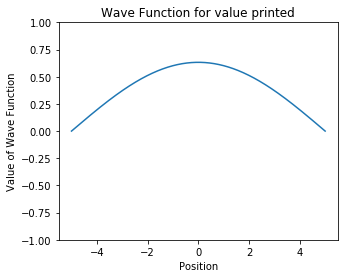

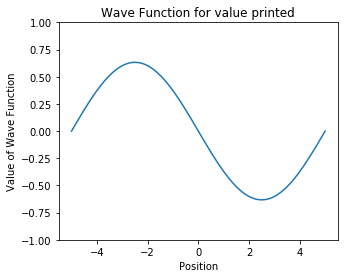

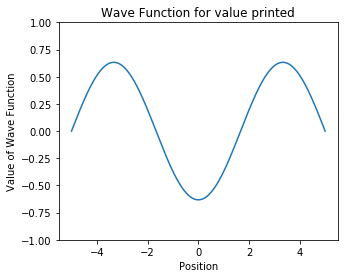

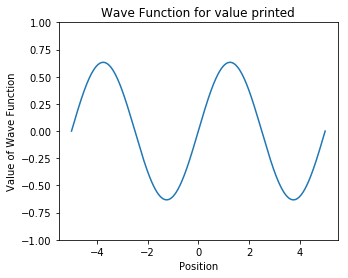

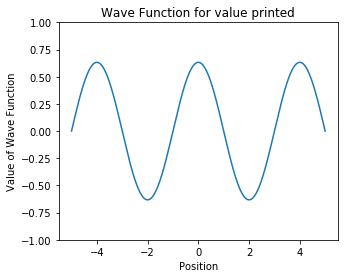

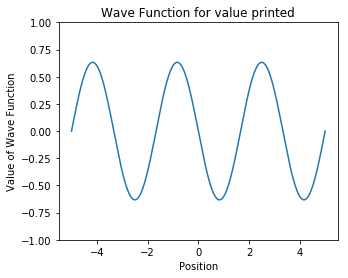

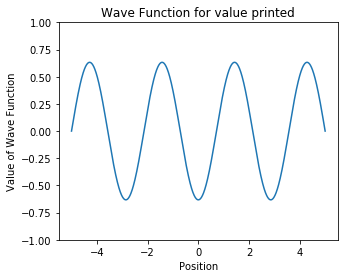

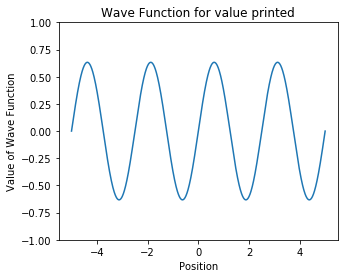

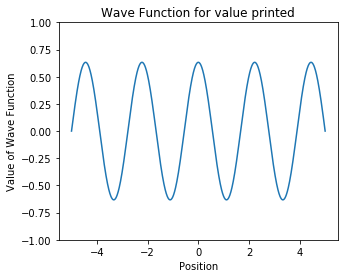

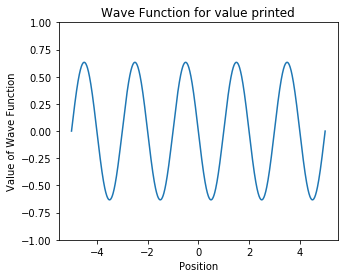

In [2]:
L = 10 #length
#Define our parameters
x = np.linspace(-L/2,L/2, 1000)

#set constants
L = 10 #length
m = 9.11e-30 #mass
h = 6.63e-34 #planck
A = np.sqrt(4/L) #Normalization constant

#energy function
E = lambda n: (n**2*np.pi**2*h**2)/(2*m*L**2)
#wave vector function
k = lambda x,n: n*np.pi/L #look at this fancy lambda function

def psi(x,n):
    if n%2==0:
        x=A*np.sin(k(x,n)*x)*((-1)**(n/2))
    else:
        x=A*np.cos(k(x,n)*x)*((-1)**((n-1)/2))
    return x

def diff2(x, n):
    h=1e-10
    func=psi

    return(((func(x+h,n)-2*func(x,n))+func(x-h,n)/h**2))

x = np.linspace(-L/2,L/2, 1000)
#Create array of Hamiltonian
N=len(x)
H=scipy.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N, N)).toarray()
    
w,v = linalg.eig(H)


n_arr = [1,2,3,4,5,6,7,8,9,10]
print n_arr
for i in n_arr:  
    #plt.plot(x, psi(x,num)*np.exp(-w[num]*t)) #time addition
    plt.figure(figsize=(5,4))
    plt.plot(x, psi(x,np.float64(n_arr[i-1])))
    plt.title('Wave Function for value printed')
    plt.xlabel('Position')
    plt.ylabel('Value of Wave Function')
    #plt.xlim(-2.5,2.5)
    plt.ylim(-1,1)
    
plt.show()

We could work with this but instead we use the forward difference method and analyze the hamiltonian. 

In [4]:
L=10
x = np.linspace(-L/2,L/2, 1000)
N=len(x)
H=-scipy.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N, N)).toarray()
E_val,E_vec = linalg.eig(H) 
E_vec_inv=linalg.inv(E_vec)
#gaussian
s = signal.gaussian(N, std=100)
#coefficeints as represented in class
weight=E_vec_inv.dot(s)
time_ev_c=E_vec.dot(weight)
print(H)

[[ 2. -1. -0. ... -0. -0. -0.]
 [-1.  2. -1. ... -0. -0. -0.]
 [-0. -1.  2. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ...  2. -1. -0.]
 [-0. -0. -0. ... -1.  2. -1.]
 [-0. -0. -0. ... -0. -1.  2.]]


[0, 1, 2, 3, 4, 5]


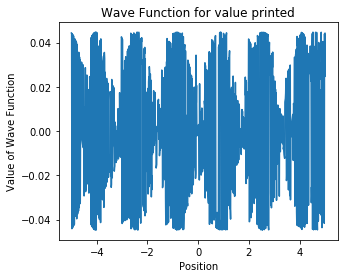

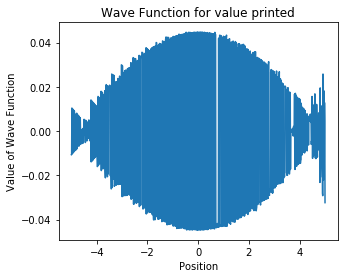

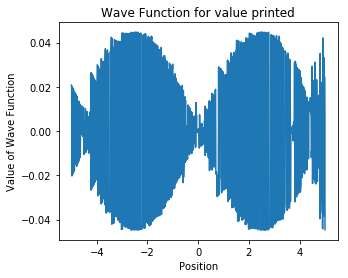

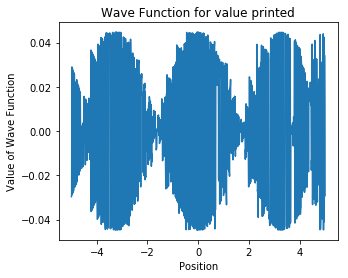

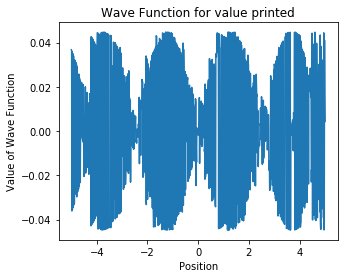

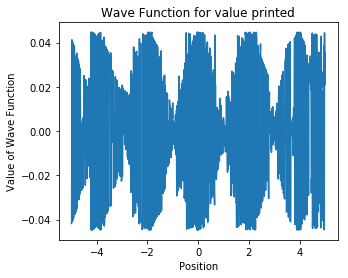

In [6]:
n_arr = [0,1,2,3,4,5]
print(n_arr)
for i in n_arr:
    plt.figure(figsize=(5,4))
    plt.plot(x, E_vec[n_arr[i-1]])
    plt.title('Wave Function for value printed')
    plt.xlabel('Position')
    plt.ylabel('Value of Wave Function')

We can evolve a gaussian in time withing a box

In [8]:
def time_evolve(time):
    weights = weight * np.cos((E_val*9.48**33) * time)
    ev = E_vec.dot(weights)
    return ev

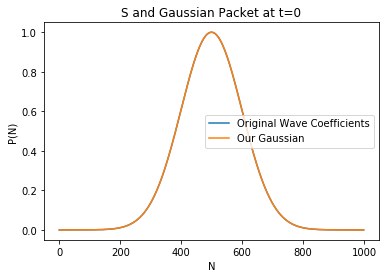

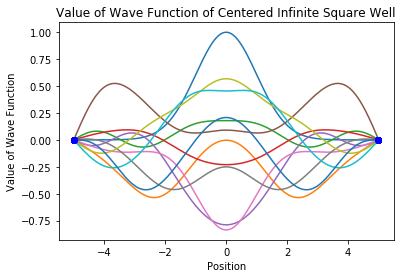

In [9]:
plt.plot(time_ev_c,label="Original Wave Coefficients")
plt.plot(s,label="Our Gaussian")
plt.title('S and Gaussian Packet at t=0')
plt.xlabel('N')
plt.ylabel('P(N)')
plt.legend()
plt.show()

t_arr=[0,1,2,3,4,5,6,7,8,9,10,12]
for i in np.arange(1,len(t_arr)):
    plt.plot(x, time_evolve(t_arr[i-1]),label="Time"+ str(t_arr[i]))
    plt.title('Value of Wave Function of Centered Infinite Square Well')
    plt.xlabel('Position')
    plt.ylabel('Value of Wave Function')
    plt.plot(L/2,0, '--bo')
    plt.plot(-L/2,0, '--bo')
plt.show()

Now we alter the system to instead compute the wavefunction in the finite square well potential, we only do this computationally.

In [10]:
L=100
x = np.linspace(-3*L/2,3*L/2, 1000)
N=len(x)
H=scipy.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N, N)).toarray()
V = 10**-5

for i in range(0,len(x)):
    if x[i]>-L/2:
        if x[i]<L/2:
            H[i][i] = H[i][i] - V

            
E_val,E_vec = linalg.eig(H)
E_vec_inv=linalg.inv(E_vec)
#gaussian
s = signal.gaussian(N, std=100)
#coefficeints as represented in class
weight=E_vec_inv.dot(s)
time_ev_c=E_vec.dot(weight)

[1, 2, 3, 4, 5]


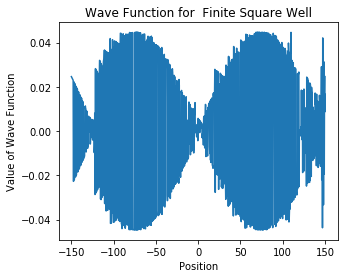

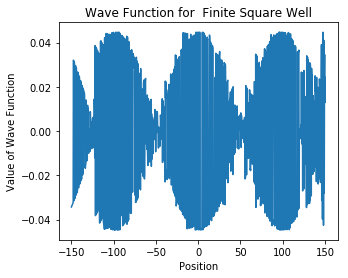

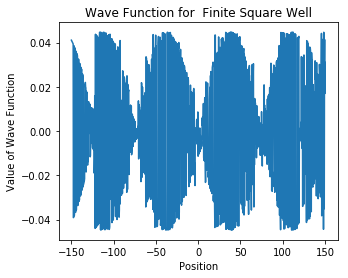

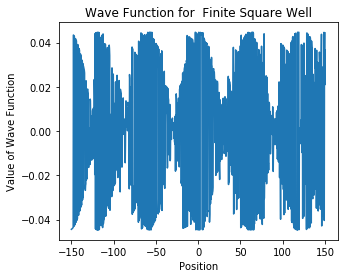

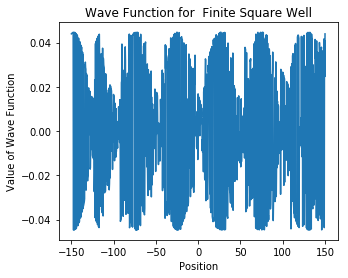

In [11]:
n_arr = [1,2,3,4,5]
print n_arr
for i in n_arr:  
    plt.figure(figsize=(5,4))
    if n_arr[i-1]==0:
        print "ignore first plot"
    plt.plot(x, E_vec[n_arr[i-1]])
    plt.title('Wave Function for  Finite Square Well')
    plt.xlabel('Position')
    plt.ylabel('Value of Wave Function')
    #plt.xlim(-2.5,2.5)
    #plt.ylim(-1,1)
    
plt.show()

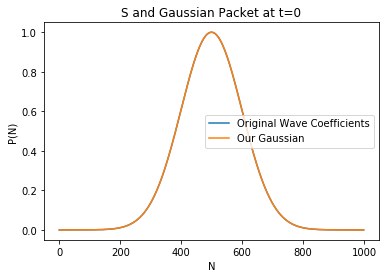

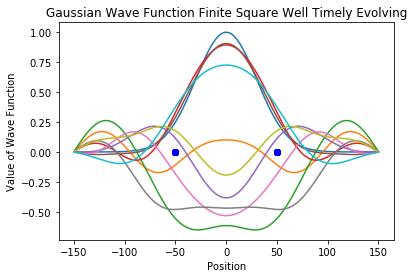

In [12]:
plt.plot(time_ev_c,label="Original Wave Coefficients")
plt.plot(s,label="Our Gaussian")
plt.title('S and Gaussian Packet at t=0')
plt.xlabel('N')
plt.ylabel('P(N)')
plt.legend()
plt.show()

t_arr=[0,.5,1,2,3,4,5,6,7,8,9]
for i in np.arange(1,len(t_arr)):
    plt.plot(x, time_evolve(t_arr[i-1]))
    plt.title('Gaussian Wave Function Finite Square Well Timely Evolving')
    plt.plot(L/2,0, '--bo')
    plt.plot(-L/2,0, '--bo')
    plt.xlabel('Position')
    plt.ylabel('Value of Wave Function')
plt.show()

As you can see, when we set out our energy function accurately, we see particles escaping and being transmitted across the boundary! (Blue dots label boundaries of the well)